In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
tables = pd.read_html(url) # тут отримую список lists!
print(type(tables))
print(f'total_tables:', {len(tables)})
df = tables[12] # А тут вже датафрейм!
print(type(df))

<class 'list'>
total_tables: {77}
<class 'pandas.core.frame.DataFrame'>


In [22]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  271.0  214.0  140.0   109    61    98   82    —


In [23]:
print("Shape of the dataframe:", df.shape)

Shape of the dataframe: (28, 9)


In [24]:
missing_data = df.isnull().sum() / len(df)
print("Missing data percentage:\n", missing_data)

Missing data percentage:
 Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.000000
2019      0.000000
dtype: float64


In [25]:
df.replace("—", np.nan, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [26]:
print(df.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object


In [27]:
regions = df.iloc[:, 0]
data = df.iloc[:, 1:]
print(data.head())
print(regions.head())

    1950   1960   1970  1990  2000  2012 2014 2019
0  230.0  206.0  160.0   130    73   126  NaN  NaN
1  224.0  192.0  142.0   124    84   112  109   76
2  247.0  250.0  179.0   153   112   148  141  101
3  204.0  204.0  151.0   123    71   112  111   71
4  271.0  214.0  140.0   109    61    98   82  NaN
0                Крим
1           Вінницька
2           Волинська
3    Дніпропетровська
4            Донецька
Name: Регіон, dtype: object


In [28]:
data = data.apply(pd.to_numeric)

In [29]:
df = pd.concat([regions, data], axis=1)

In [30]:
country_total_row = df[df[regions.name].str.contains("Україна", na=False)]
if not country_total_row.empty:
    df = df.drop(country_total_row.index)

In [31]:
print(df.head())

             Регіон   1950   1960   1970  1990  2000  2012   2014   2019
0              Крим  230.0  206.0  160.0   130    73   126    NaN    NaN
1         Вінницька  224.0  192.0  142.0   124    84   112  109.0   76.0
2         Волинська  247.0  250.0  179.0   153   112   148  141.0  101.0
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111.0   71.0
4          Донецька  271.0  214.0  140.0   109    61    98   82.0    NaN


In [32]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda col: col.fillna(col.mean()))

In [33]:
mean_2019 = df['2019'].mean()
regions_above_mean_2019 = df[df['2019'] > mean_2019][regions.name]
print("Регіони з народжуваністю вище середнього у 2019 році:\n", regions_above_mean_2019)

Регіони з народжуваністю вище середнього у 2019 році:
 2             Волинська
6          Закарпатська
8     Івано-Франківська
12            Львівська
14              Одеська
16           Рівненська
20           Херсонська
23          Чернівецька
25                 Київ
Name: Регіон, dtype: object


In [34]:
max_birth_2014 = df.loc[df['2014'].idxmax()][regions.name]
print("Регіон з найвищою народжуваністю у 2014 році:", max_birth_2014)

Регіон з найвищою народжуваністю у 2014 році: Рівненська


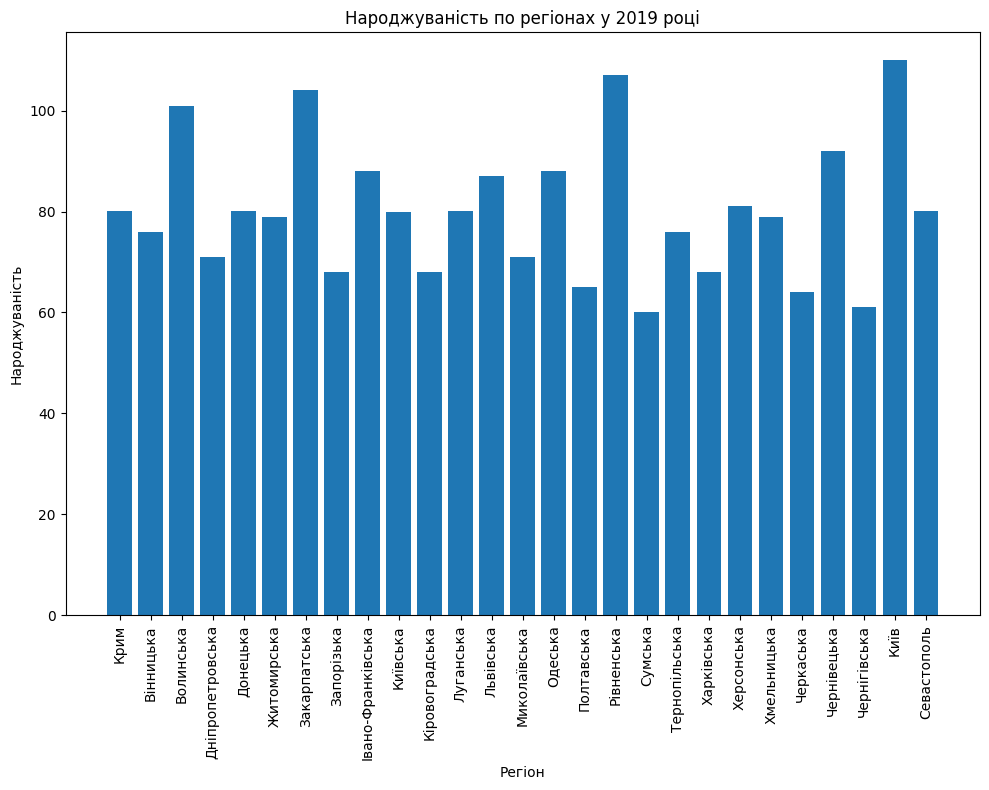

In [35]:
plt.figure(figsize=(10,8))
plt.bar(df[regions.name], df['2019'])
plt.xticks(rotation=90)
plt.title('Народжуваність по регіонах у 2019 році')
plt.xlabel('Регіон')
plt.ylabel('Народжуваність')
plt.tight_layout()
plt.show()

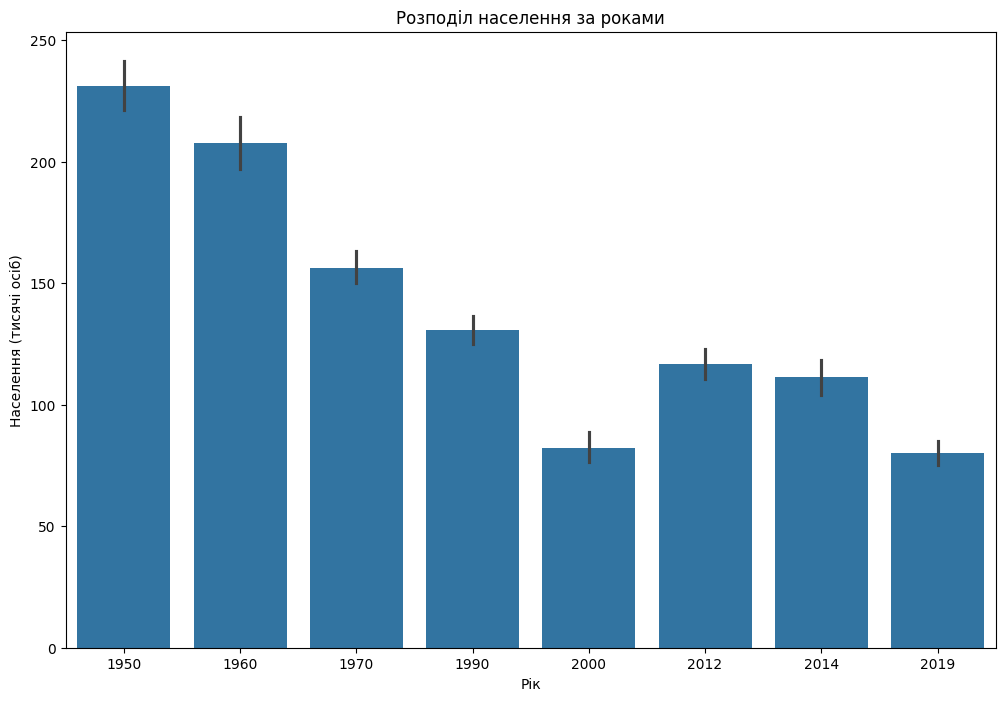

In [36]:
ukraine_long_df = df.melt(id_vars=['Регіон'], var_name='Рік', value_name='Населення')

plt.figure(figsize=(12, 8))
sns.barplot(data=ukraine_long_df, x='Рік', y='Населення')
plt.title('Розподіл населення за роками')
plt.xlabel('Рік')
plt.ylabel('Населення (тисячі осіб)')
plt.show()

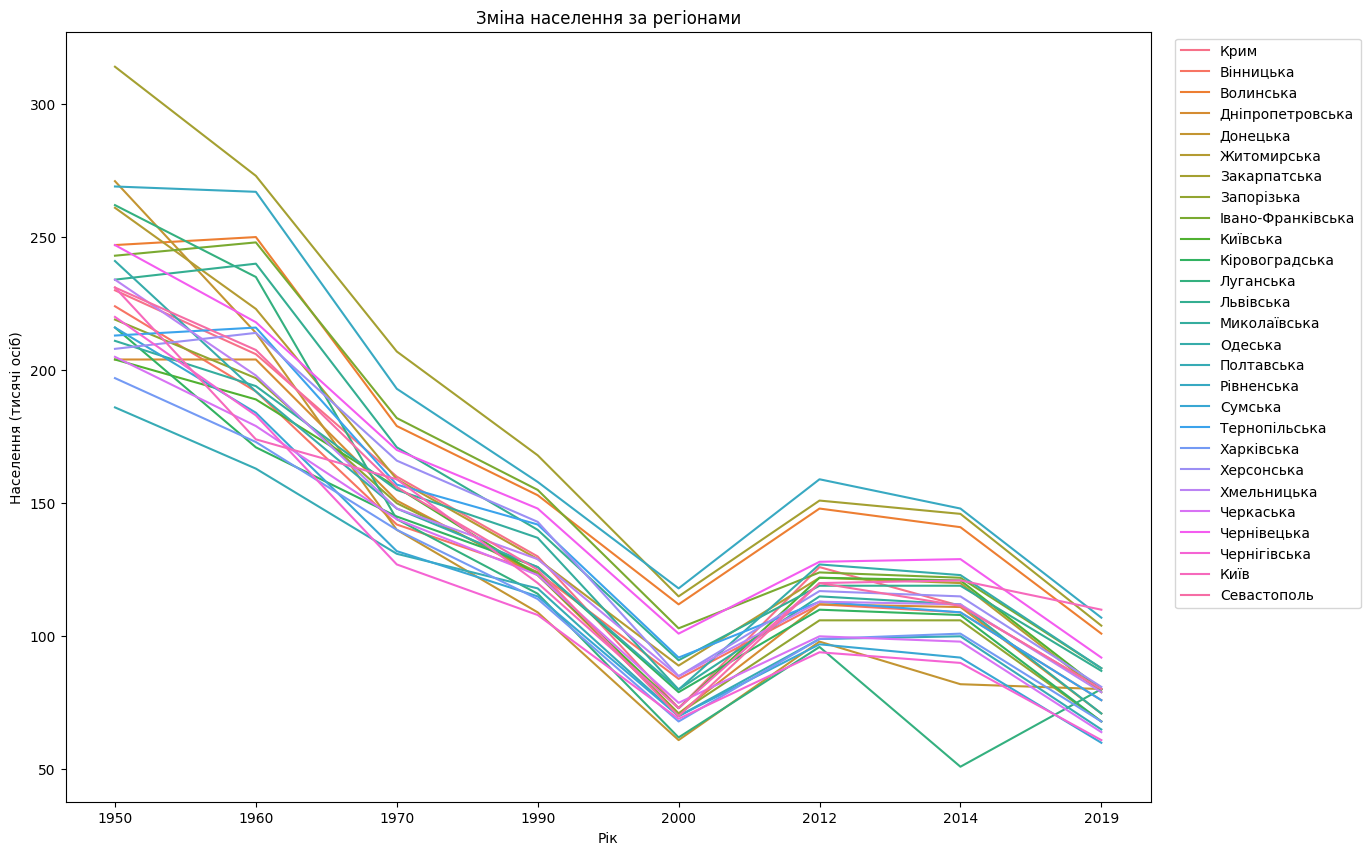

In [37]:
plt.figure(figsize=(14, 10))
sns.lineplot(data=ukraine_long_df, x='Рік', y='Населення', hue='Регіон')
plt.title('Зміна населення за регіонами')
plt.xlabel('Рік')
plt.ylabel('Населення (тисячі осіб)')
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

<ipython-input-40-f9e00f82883f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_population, x='Населення', y='Регіон', palette='viridis')


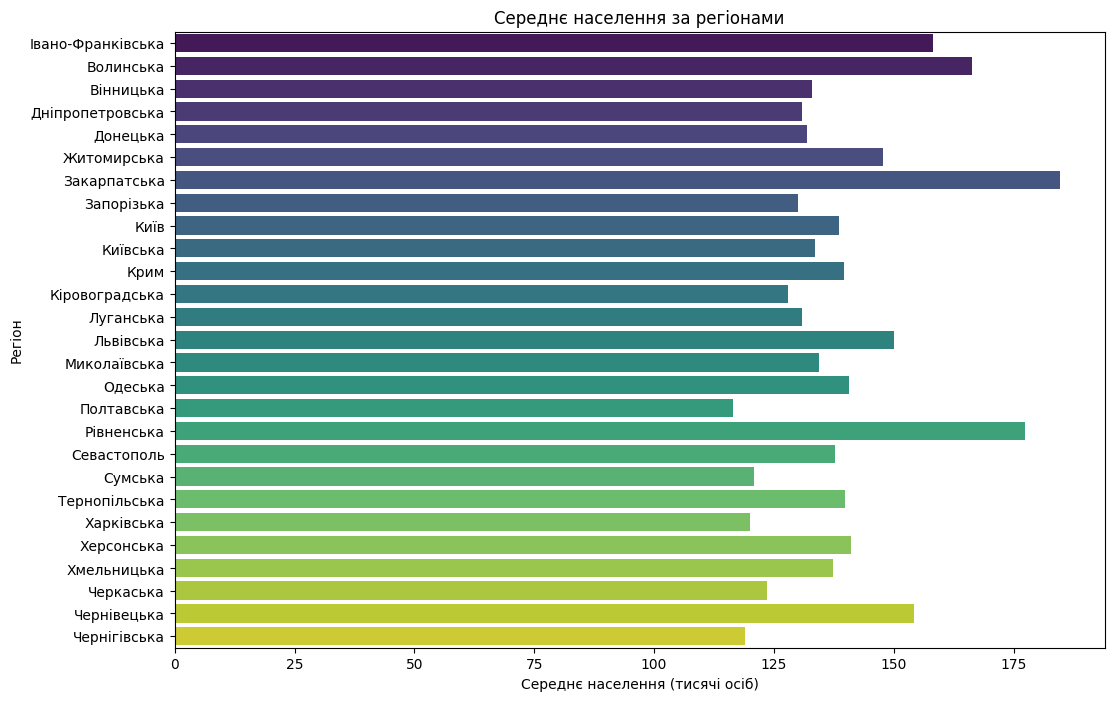

In [40]:
average_population = ukraine_long_df.groupby('Регіон')['Населення'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=average_population, x='Населення', y='Регіон', palette='viridis')
plt.title('Середнє населення за регіонами')
plt.xlabel('Середнє населення (тисячі осіб)')
plt.ylabel('Регіон')
plt.show()